# Predicting Housing Prices Project

## Project Outline
### 0. Problem Definition  
### 1. Import Libraries
### 2. Data Import  
### 3. Data Exploration (EDA)  
### 4. Data Cleaning & Preprocessing  
### 5. Modeling  
### 6. Evaluation  
### 7. Deployment  
### 8. Documentation & Reporting  
### 9. Conclusion & Future Work  

## 1. Import Libraries

In [4]:
# Data and Processing
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


## 2. Data Import

In [9]:
train_path = '/Users/kevingoldberg/Documents/Personal Projects/Housing/house-prices-advanced-regression-techniques/train.csv'
test_path = '/Users/kevingoldberg/Documents/Personal Projects/Housing/house-prices-advanced-regression-techniques/test.csv'
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

## 3. Data Exploration

### 3.1 Preview the Data

In [11]:
display(df_train.head())
display(df_test.head())
print(df_train.shape, df_test.shape)
print(df_train.columns)
df_train.info()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1460, 81) (1459, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Ga

### 3.2 Understand Data Types

In [32]:
df_features = df_train.drop(columns=['SalePrice','Id'])  # drop the target
df_target = df_train['SalePrice']
display(df_features.dtypes.to_frame(name='Data Type'))
display(df_features.dtypes.value_counts())

# Separate features by Type
numeric_cols = df_features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_features.select_dtypes(include='object').columns.tolist()
bool_cols = df_features.select_dtypes(include='bool').columns.tolist()

# Display the number of unique values in each feature
df_features.nunique().sort_values()


,Data Type
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
...,...
MiscVal,int64
MoSold,int64
YrSold,int64
SaleType,object


object     43
int64      33
float64     3
Name: count, dtype: int64

CentralAir         2
Street             2
Alley              2
Utilities          2
GarageFinish       3
                ... 
TotalBsmtSF      721
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Length: 79, dtype: int64

### 3.3 Identify Missing Values

,Missing Count,Missing %
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


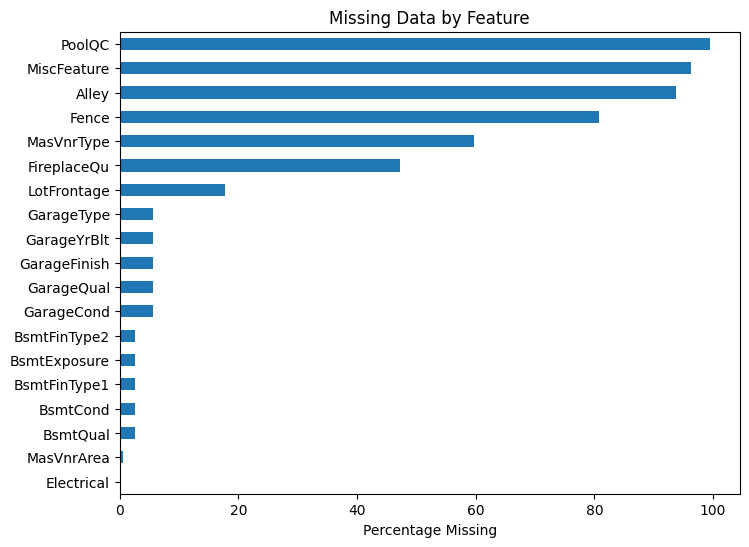

Missing in Numeric Columns:


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

Missing in Categorical Columns:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
GarageType        81
GarageCond        81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
Electrical         1
dtype: int64

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,missing_row_count,missing_row_percent
1218,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,7,2006,WD,Normal,16,20.00
533,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,Inside,...,NaN,NaN,NaN,0,1,2007,WD,Normal,16,20.00
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2008,WD,AdjLand,16,20.00
1011,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,5,2010,WD,Normal,16,20.00
1179,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,4,2006,WD,Normal,15,18.75


In [40]:
# Display missing values summary
missing_counts = df_features.isnull().sum()
missing_percent = df_features.isnull().mean() * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]\
                    .sort_values(by='Missing %', ascending=False)

display(missing_summary)

# Visualize missing values
missing_summary['Missing %'].plot(kind='barh', figsize=(8, 6))
plt.xlabel("Percentage Missing")
plt.title("Missing Data by Feature")
plt.gca().invert_yaxis()
plt.show()

missing_numeric = df_features[numeric_cols].isnull().sum().sort_values(ascending=False)
missing_categorical = df_features[categorical_cols].isnull().sum().sort_values(ascending=False)

print("Missing in Numeric Columns:")
display(missing_numeric[missing_numeric > 0])

print("Missing in Categorical Columns:")
display(missing_categorical[missing_categorical > 0])

# Display row counts for missing values
df_features['missing_row_count'] = df_features.isnull().sum(axis=1)
df_features['missing_row_percent'] = df_features.isnull().mean(axis=1) * 100
df_features.sort_values('missing_row_percent', ascending=False).head()


### 3.4 Describe Statistical Summary

### 3.5 Explore Target Variable

### 3.6 Explore Numerical Features

### 3.7 Explore Categorical Features

### 3.8 Explore Relationships

### 3.9 Look for Duplicate/Constant Columns